In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import json

#load the data
#housedata = pd.read_csv("Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
incomedata = pd.read_csv("US counties - education vs per capita personal income - results-20221227-213216.csv")


In [6]:
incomedata.shape


(3006, 10)

In [7]:
incomedata.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84
1,35028,NM,"Los Alamos, NM",72366,75949,81306,2766,9098,20.54,67.56
2,8013,CO,"Boulder, CO",79698,83173,89593,45834,135876,21.24,62.97
3,24027,MD,"Howard, MD",78013,82041,86380,42538,136792,19.49,62.67
4,36061,NY,"New York, NY",173525,175327,195543,167960,777483,13.43,62.18


In [9]:
#To check if the data is all there
missing_data = incomedata.isna().mean().sort_values()

In [42]:
incomedata.isna().sum()

county_FIPS                              0
state                                    0
county                                   0
per_capita_personal_income_2019          0
per_capita_personal_income_2020          0
per_capita_personal_income_2021          0
associate_degree_numbers_2016_2020       0
bachelor_degree_numbers_2016_2020        0
associate_degree_percentage_2016_2020    0
bachelor_degree_percentage_2015_2019     0
income_diff                              0
dtype: int64

# Things we could learn
- Where did the value go down?
- Do degrees help grow the income for a county?
- What is the total GDP of the county?
- How does the GDP of the county corrilate to the house value


<AxesSubplot: >

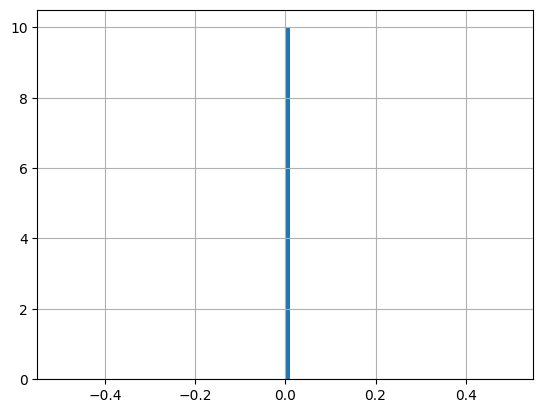

In [10]:
missing_data.hist(bins=100)

In [45]:
# Where did the value go down?
# def income_diff(series: pd.Series) -> int : #next time use 3.9 so we can use more type safety
#     per_capita_personal_income_2019 = series['per_capita_personal_income_2019']
#     per_capita_personal_income_2021 = series['per_capita_personal_income_2021']
#     return per_capita_personal_income_2021 - per_capita_personal_income_2019
    
#incomedata["income_diff"] = incomedata.apply(income_diff, axis = 1)  #the 1 made it look at rows instead of columns (default)

incomedata["income_diff"] = incomedata['per_capita_personal_income_2021'] - incomedata['per_capita_personal_income_2019']



In [46]:
incomedata.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,income_diff
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,9974
1,35028,NM,"Los Alamos, NM",72366,75949,81306,2766,9098,20.54,67.56,8940
2,8013,CO,"Boulder, CO",79698,83173,89593,45834,135876,21.24,62.97,9895
3,24027,MD,"Howard, MD",78013,82041,86380,42538,136792,19.49,62.67,8367
4,36061,NY,"New York, NY",173525,175327,195543,167960,777483,13.43,62.18,22018


array([[<AxesSubplot: title={'center': 'income_diff'}>]], dtype=object)

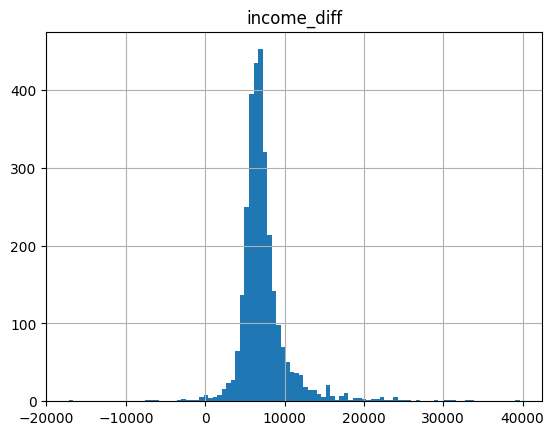

In [47]:
incomedata.hist(column='income_diff', bins=100)

In [29]:
# Some areas did go down, and we had some very wealthy areas where it shot up.
# Can we coorilate that house prices went up or down in response to income level?


In [30]:
#load the  housing data
#housedata = pd.read_csv("Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
housedata = pd.read_csv("Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")


In [31]:
#Next time figure out the Compount Agregage https://www.investopedia.com/terms/c/cagr.asp
#Turn the strings into dates python function date, then subtract the dates and figure out how many years
from datetime import date
def num_years(begin_date :date, end_date :date) -> int :
    if(begin_date > end_date) :
        date_diff = begin_date - end_date
    else :
        date_diff = end_date - begin_date

    return date_diff.days/365

In [35]:
date_columns = [col for col in housedata.columns if col.startswith('20')]

def cagr(begin_value, end_value, years) -> int : #next time use 3.9 so we can use more type safety
    if(begin_value == 0) :
        return 0
    if(years == 0):
        return 0
    return (((end_value/begin_value)**(1/years))-1) * 100

#Loop through all the rows and get the CAGR
from datetime import datetime
def cagr_limits(series: pd.Series, date_columns: list = date_columns) -> tuple : #next time use 3.9 so we can use more type safety
    first_entry = series[date_columns].dropna().index[0]
    last_entry = series[date_columns].dropna().index[-1]
    date_diff = num_years(datetime.strptime(first_entry, '%Y-%m-%d'), datetime.strptime(last_entry, '%Y-%m-%d'))
    first_value = series[first_entry]
    last_value = series[last_entry]
    result = cagr(first_value, last_value, date_diff)
#    print("City {}, CAGR {}, Start Date {}, Start Value {}, End Date {}, End Value {}".format("City", result, first_entry, first_value, last_entry, last_value))
    return result

In [36]:
housedata["CAGR"] = housedata.apply(cagr_limits, axis = 1)
housedata.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,CAGR
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107184.0,...,261757.0,267452.0,273750.0,279865.0,284916.0,288326.0,290250.0,290894.0,291871.0,4.498842
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,223094.0,...,454220.0,465824.0,479498.0,490869.0,498347.0,500609.0,498747.0,499289.0,501368.0,3.621100
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90164.0,...,177626.0,179773.0,183128.0,186726.0,190164.0,192396.0,194095.0,195477.0,197127.0,3.495866
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,186206.0,...,564481.0,566396.0,567898.0,570676.0,572891.0,574998.0,575933.0,578691.0,582277.0,5.135762
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275596.0,...,750970.0,756670.0,759268.0,765087.0,770360.0,775517.0,778187.0,781268.0,787104.0,4.717849


In [37]:
county_table = pd.read_csv(r'county.txt', names=['State', 'StateFips', 'CountyFips', 'County Name', 'H'])
print(county_table)

     State  StateFips  CountyFips        County Name   H
0       AL          1           1     Autauga County  H1
1       AL          1           3     Baldwin County  H1
2       AL          1           5     Barbour County  H1
3       AL          1           7        Bibb County  H1
4       AL          1           9      Blount County  H1
...    ...        ...         ...                ...  ..
3230    PR         72         153    Yauco Municipio  H1
3231    UM         74         300     Midway Islands  H4
3232    VI         78          10   St. Croix Island  H4
3233    VI         78          20    St. John Island  H4
3234    VI         78          30  St. Thomas Island  H4

[3235 rows x 5 columns]


In [40]:
housedata_fips.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,CAGR,StateFips,CountyFips,County Name,H
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107184.0,...,284916.0,288326.0,290250.0,290894.0,291871.0,4.498842,48,201,Harris County,H1
1,91733,7,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,106223.0,...,276972.0,279867.0,281519.0,282215.0,283366.0,4.404476,48,201,Harris County,H1
2,91926,36,77433,zip,TX,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,183940.0,...,429007.0,434564.0,437520.0,438199.0,439410.0,3.899486,48,201,Harris County,H1
3,91922,52,77429,zip,TX,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,162181.0,...,378399.0,382935.0,385251.0,385754.0,386842.0,3.892549,48,201,Harris County,H1
4,91889,75,77379,zip,TX,TX,Spring,"Houston-The Woodlands-Sugar Land, TX",Harris County,168440.0,...,369969.0,373832.0,375776.0,377363.0,379423.0,3.631683,48,201,Harris County,H1


In [52]:
incomedata.loc[incomedata['county_FIPS'] == 1001] #loc is thought of as "Where"

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,income_diff
643,1001,AL,"Autauga, AL",42846,45248,48347,10986,10721,29.02,28.32,5501


In [63]:
state=1
county=1
int(f"{state}{county:03}")

1001

0        201
1        201
2        201
3        201
4        201
        ... 
26740     53
26741     29
26742    319
26743    165
26744     55
Name: CountyFips, Length: 26745, dtype: int64

In [67]:
# IF This had been a string
#housedata_fips["fips"] = int(f"{housedata_fips['StateFips']}{housedata_fips['CountyFips']:03}")
housedata_fips["fips"] = housedata_fips['StateFips']*1000 + housedata_fips['CountyFips']

In [68]:
housedata_fips.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,CAGR,StateFips,CountyFips,County Name,H,fips
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107184.0,...,288326.0,290250.0,290894.0,291871.0,4.498842,48,201,Harris County,H1,48201
1,91733,7,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,106223.0,...,279867.0,281519.0,282215.0,283366.0,4.404476,48,201,Harris County,H1,48201
2,91926,36,77433,zip,TX,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,183940.0,...,434564.0,437520.0,438199.0,439410.0,3.899486,48,201,Harris County,H1,48201
3,91922,52,77429,zip,TX,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,162181.0,...,382935.0,385251.0,385754.0,386842.0,3.892549,48,201,Harris County,H1,48201
4,91889,75,77379,zip,TX,TX,Spring,"Houston-The Woodlands-Sugar Land, TX",Harris County,168440.0,...,373832.0,375776.0,377363.0,379423.0,3.631683,48,201,Harris County,H1,48201


In [92]:
alldata = pd.merge(housedata_fips, incomedata, left_on=['fips'], right_on = ['county_FIPS'], how="left")
alldata.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,income_diff
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107184.0,...,TX,"Harris, TX",60566.0,61643.0,65869.0,801530.0,966592.0,26.75,32.26,5303.0
1,91733,7,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,106223.0,...,TX,"Harris, TX",60566.0,61643.0,65869.0,801530.0,966592.0,26.75,32.26,5303.0
2,91926,36,77433,zip,TX,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,183940.0,...,TX,"Harris, TX",60566.0,61643.0,65869.0,801530.0,966592.0,26.75,32.26,5303.0
3,91922,52,77429,zip,TX,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,162181.0,...,TX,"Harris, TX",60566.0,61643.0,65869.0,801530.0,966592.0,26.75,32.26,5303.0
4,91889,75,77379,zip,TX,TX,Spring,"Houston-The Woodlands-Sugar Land, TX",Harris County,168440.0,...,TX,"Harris, TX",60566.0,61643.0,65869.0,801530.0,966592.0,26.75,32.26,5303.0


In [93]:
alldata.shape

(26745, 300)

In [94]:
housedata_fips.shape

(26745, 289)

In [95]:
alldata.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       'state', 'county', 'per_capita_personal_income_2019',
       'per_capita_personal_income_2020', 'per_capita_personal_income_2021',
       'associate_degree_numbers_2016_2020',
       'bachelor_degree_numbers_2016_2020',
       'associate_degree_percentage_2016_2020',
       'bachelor_degree_percentage_2015_2019', 'income_diff'],
      dtype='object', length=300)

In [96]:

keepcolumns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', 
              '2019-01-31', '2022-10-31', 'income_diff','fips']

alldata = alldata[keepcolumns]

In [97]:
alldata.head()
alldata['houseprice_diff'] = alldata['2022-10-31'] - alldata['2019-01-31']

In [98]:
alldata.isna().sum()

RegionID              0
SizeRank              0
RegionName            0
RegionType            0
StateName             0
State                 0
City               1348
Metro              5906
CountyName            0
2019-01-31         1681
2022-10-31            5
income_diff         658
fips                  0
houseprice_diff    1686
dtype: int64

In [99]:
housedata_fips[['City','Metro']].isna().sum()

City     1348
Metro    5906
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(-100000.0, 1000000.0)

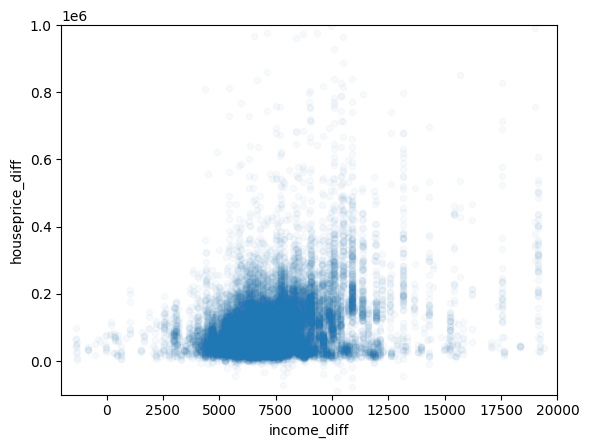

In [100]:
import matplotlib.pyplot as plt

alldata.plot(x='income_diff', y = 'houseprice_diff', kind='scatter', alpha=0.03)
plt.xlim(-2000, 20000)
plt.ylim(-0.1e6,1e6)

In [102]:
alldata['fips'].value_counts()

6037     274
17031    163
48201    131
4013     129
36103    102
        ... 
13009      1
48103      1
35009      1
17169      1
30055      1
Name: fips, Length: 2817, dtype: int64

In [107]:
alldata.loc[alldata['fips'] == 17031]
alldata.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2019-01-31', '2022-10-31',
       'income_diff', 'fips', 'houseprice_diff'],
      dtype='object')

<AxesSubplot: xlabel='income_diff', ylabel='houseprice_diff'>

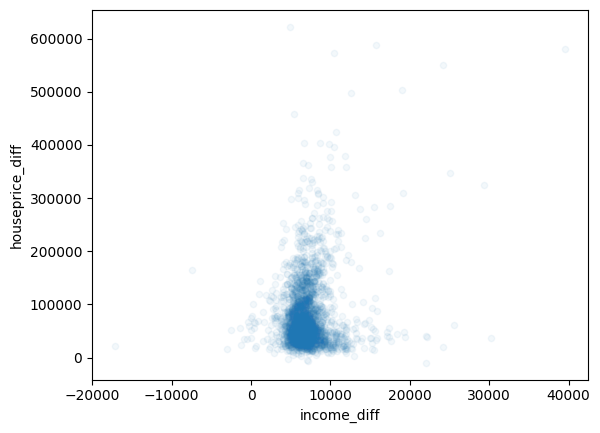

In [114]:
alldata.groupby('fips').agg({'StateName':'first', 'CountyName':'first',
       'income_diff':'mean', 'houseprice_diff':'mean'}).plot(x='income_diff',y='houseprice_diff',kind='scatter',alpha=0.05)